<center>
    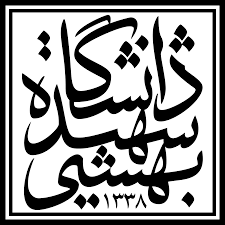
</center>

# Embedding Spaces

Estimated time needed: **120** minutes

## Objectives

After completing this lab you will be able to:


*   Embedd Texual Data into numerical vectors using `gensim` library
*   Perform operations with word vectors such as similarity checking

    


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-thttps://https://op/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01: 20px">
    <ul>
        <li><a>List in Python</a></li>
        <li>
            <a>Data Cleaning</a>
            <ul>
                <li><a>Loading Data</a></li>
                <li><a>Tokenizing</a></li>
                <li><a>Removing Stopwords</a></li>
            </ul>
        </li>
        <li>
            <a>Generating Word Vectors</a>
            <ul>
                <li><a>Word2Vec</a></li>
                <li><a>Training</a></li>
                <li><a>Similarity Checking</a></li>
            </ul>
        </li>
        <li><a>Visualizing</a></li>
    </ul>

</div>

<hr>


-   `os` and random help you define a random seed to make the code deterministically reproducible.<br>
-   `re` and string provide you with easy ways to clean the data.<br>
-   `pandas` helps you read the data.<br>
-   `numpy` provides you with linear algebra utilities you'll use to evaluate results. Also, it's used for setting a random seed to make the code deterministically reproducible.<br>
-   `gensim` makes it easy for you to train a word embedding from scratch using the Word2Vec class.<br>
-   `nltk` aids you in cleaning and tokenizing data through the use of the word_tokenize method and the stopword list.<br>
-   `sklearn` gives you an easy interface to the clustering model, MiniBatchKMeans, and the metrics to evaluate the quality of its results, silhouette_samples and silhouette_score.

on the last exercise we saw how each classic machine learning model would perform on textual data using a TF-IDF embedding, though intent classification is a little more complicated than what we saw earlier with only 3 classes to choose from, now we're trying to use semantic analysis to detect the intent of each comment using a more complicated embedding called Word2Vec, this embedding uses machine learning to build a model that would return a vector for each word in out context, the vectors are semantically connected for example the relationship of men and women, would be close to king and queen (relationship: substraction of according vectors)

In [1]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd


from gensim.models import Word2Vec 

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
  
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# nltk.download("stopwords")

We will be ignoring the catagory feature for now, we'll get back to that later

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

sentences = pd.concat([df_train, df_test]).reset_index().text #after concating indecies will be messy, reset_index will take care of that
labels = pd.concat([df_train, df_test]).reset_index().category #after concating indecies will be messy, reset_index will take care of that

In [3]:
def clean_text(text, tokenizer, stopwords):
    """Pre-process text and generate tokens

    Args:
        text: Text to tokenize.

    Returns:
        Tokenized text.
    """
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [ps.stem(t) for t in tokens]

    return tokens


custom_stopwords = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

cleaned_sentences = [clean_text(sentence, word_tokenize, custom_stopwords) for sentence in sentences]

for i in range(3): 
    print(sentences[i])
    print('Cleaned ->', *cleaned_sentences[i])
    print('-' * 50)

I am still waiting on my card?
Cleaned -> still wait card
--------------------------------------------------
What can I do if my card still hasn't arrived after 2 weeks?
Cleaned -> card still hasnt arriv week
--------------------------------------------------
I have been waiting over a week. Is the card still coming?
Cleaned -> wait week card still come
--------------------------------------------------


# Generate Document Vectors

After you've cleaned and tokenized the text, you'll use the documents' tokens to create vectors using Word2Vec. This process consists of two steps:

-   Train a Word2Vec model using the tokens you generated earlier. Alternatively, you could load a pre-trained Word2Vec model (I'll also show you how to do it).
-   Generate a vector per document based on its individual word vectors.


# Train Word2Vec Model
The following code will help you train a Word2Vec model. Copy it into a new cell in your notebook:

In [4]:
model = Word2Vec(min_count=3, vector_size=100)
model.build_vocab(cleaned_sentences)
model.train(cleaned_sentences, total_examples=model.corpus_count, epochs=model.epochs*100)

(22421220, 34641500)

In [5]:
corpus = list(model.wv.key_to_index.keys())
word_vectors = model.wv[corpus]


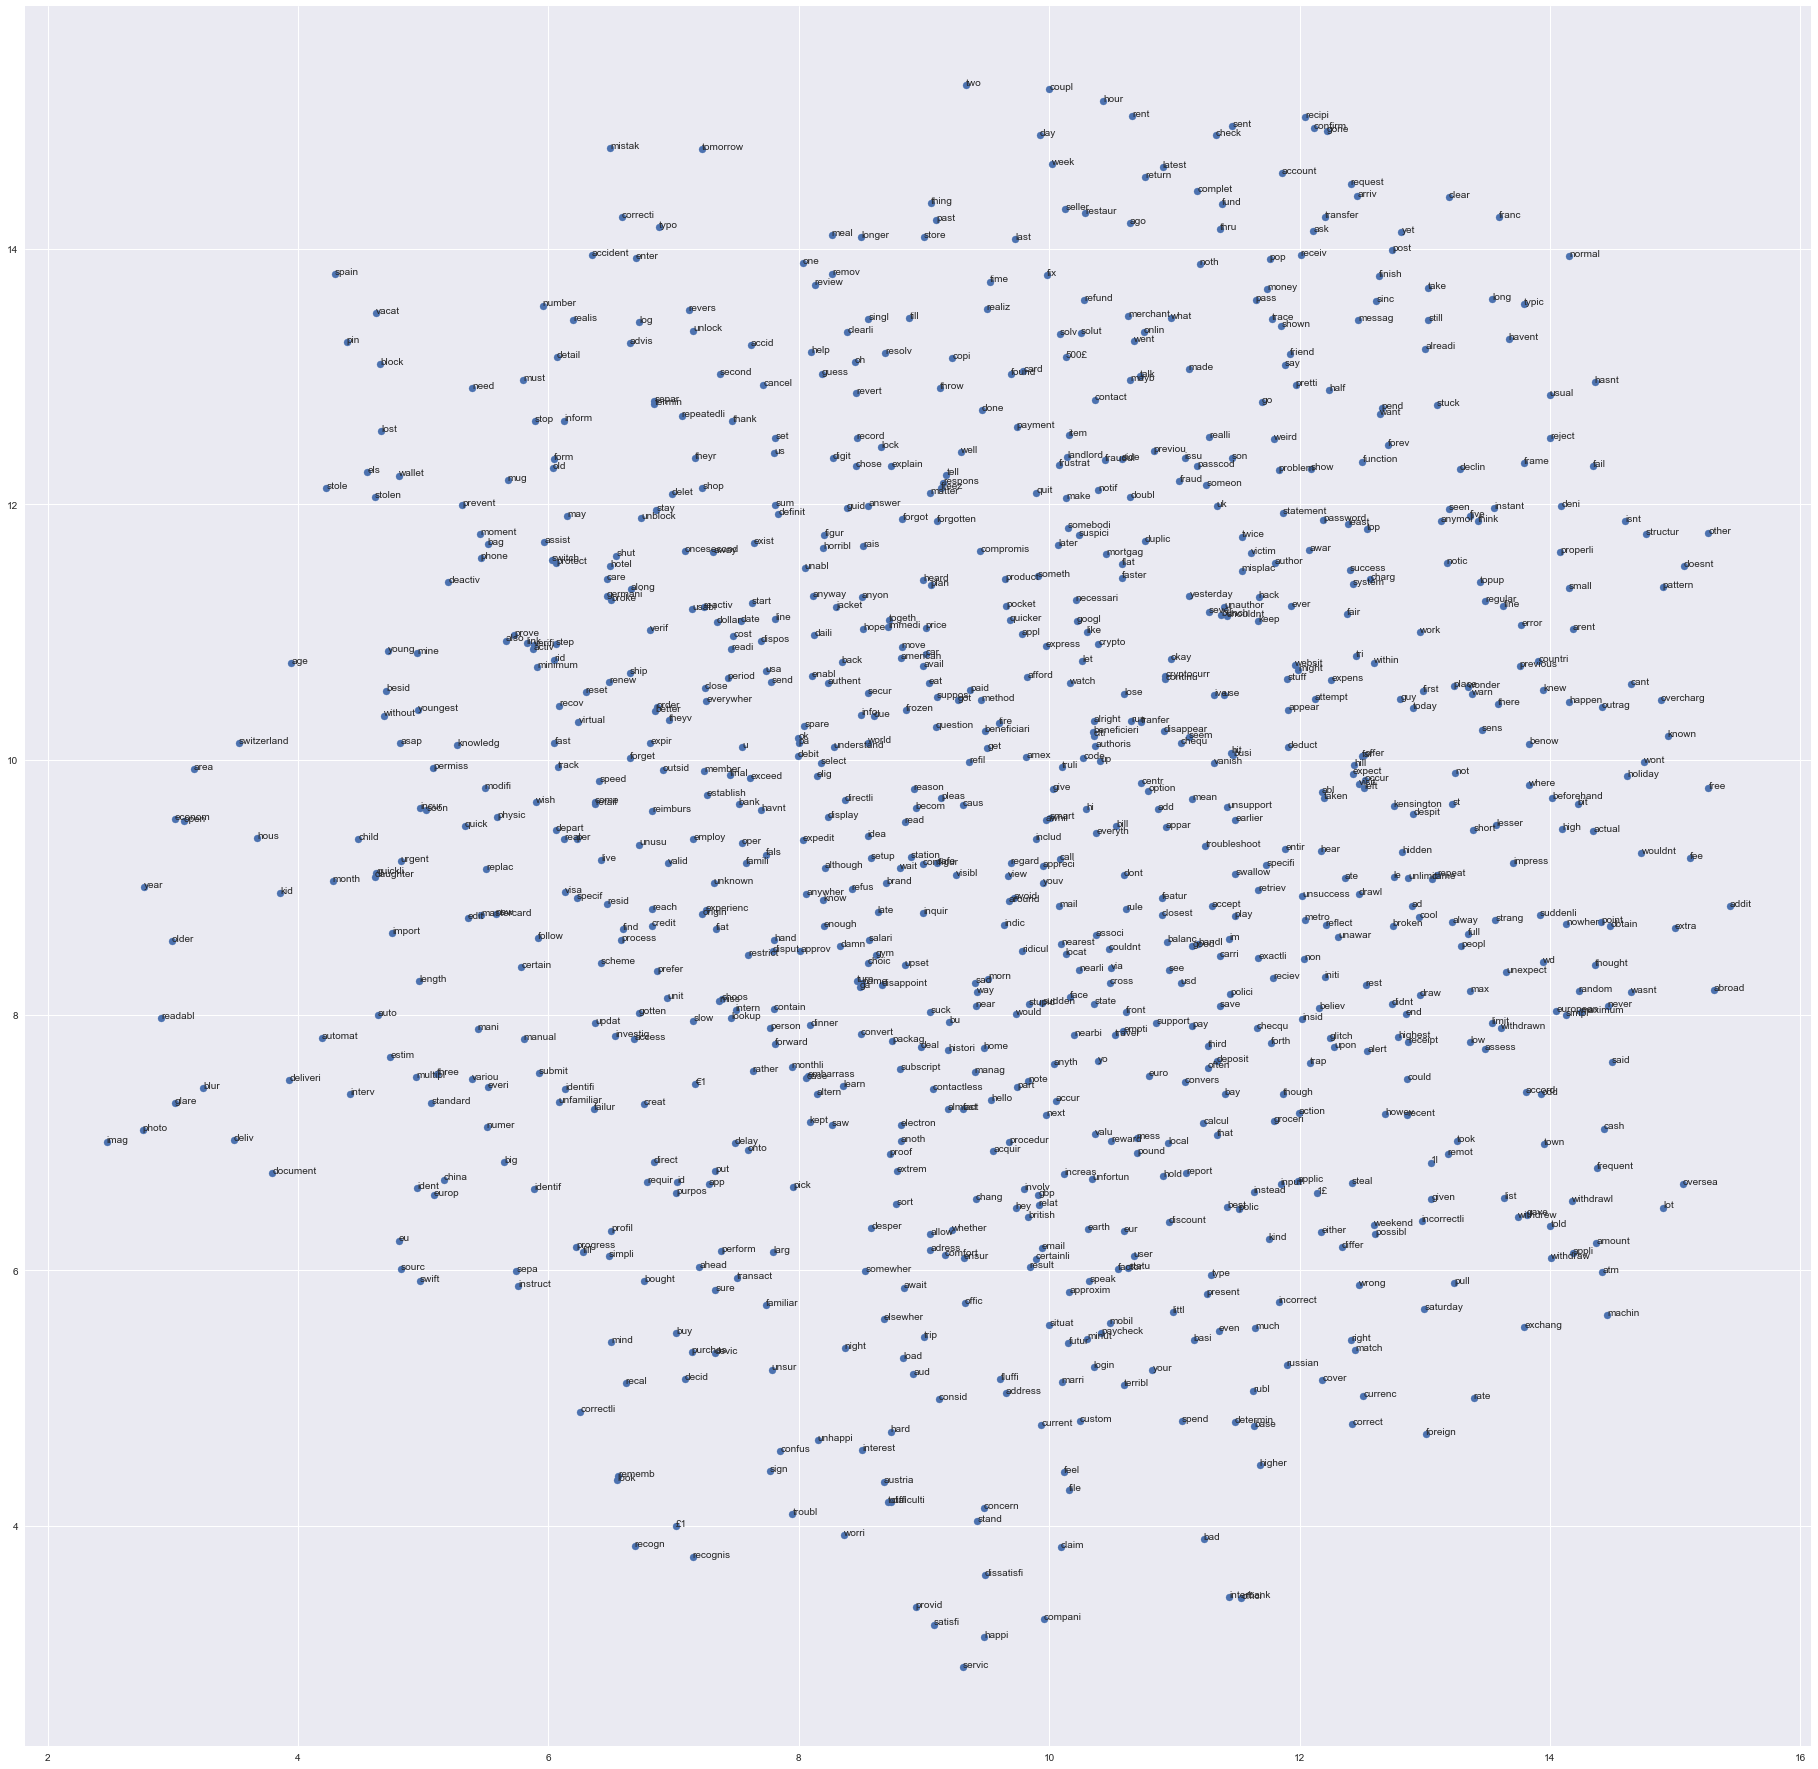

In [40]:
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=30)
word_vectors_pca = pca.fit_transform(word_vectors)

result = umap.UMAP(
    n_neighbors=3,
    min_dist=0.8,
    n_components=2,
    random_state=1,
).fit_transform(word_vectors_pca)

plt.style.use('seaborn')
plt.figure(figsize=(32, 32))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(corpus):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))

# plt.xlim([1.5, 2.7])
# plt.ylim([-6, -5])

<hr>

# Modeling

<AxesSubplot:>

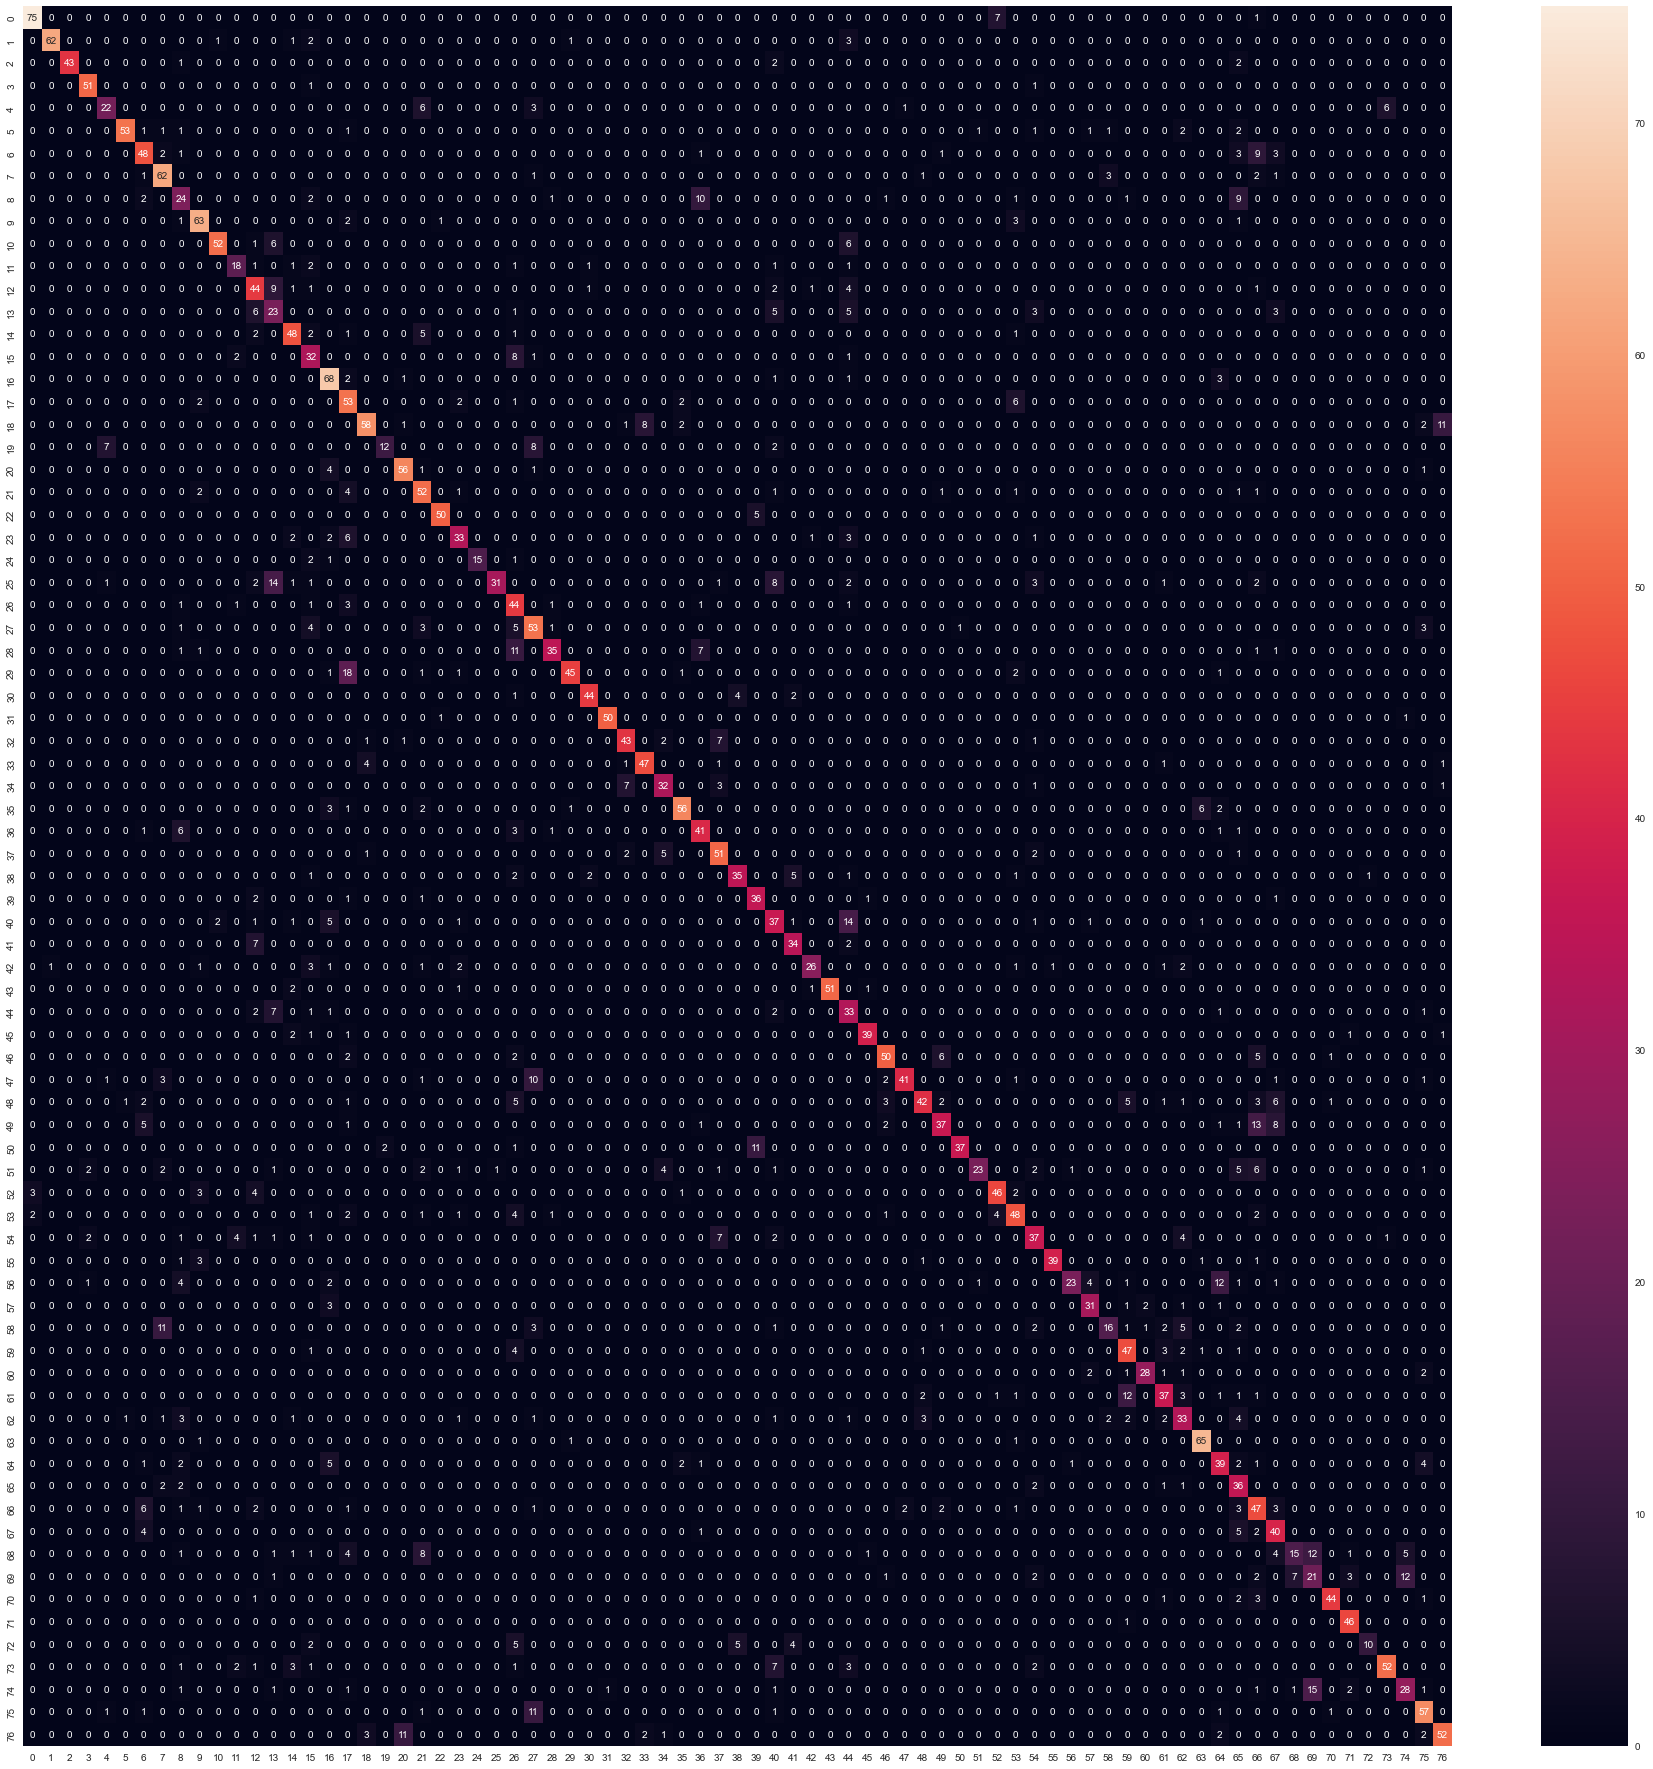

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(np.asarray(vectorized_docs)) 
X += abs(X.min()) + 0.01
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=1)


clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(32, 32))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [1]:
cm = confusion_matrix(y_test, y_pred)
sum=0
for i in range(len(cm)): 
    sum += cm[i][i]
print('Precentage of correct classifications:', sum/len(X_test))

NameError: name 'confusion_matrix' is not defined

<hr>
<h2>The last exercise!</h2>
<p>Congratulations, you have completed your first lesson and hands-on lab in Python. 
<hr>
